In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML_Project/TrafficTwoMonth.csv");
# data.shape
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [ ]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [ ]:
print(data.shape)
data.describe()

(5952, 9)


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [ ]:
data['Time'] = pd.to_datetime(data['Time']).dt.hour
data.drop(['Date'], axis=1, inplace=True)
data.head()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,Tuesday,13,2,2,24,41,normal
1,0,Tuesday,14,1,1,36,52,normal
2,0,Tuesday,10,2,2,32,46,normal
3,0,Tuesday,10,2,2,36,50,normal
4,1,Tuesday,11,2,1,34,48,normal


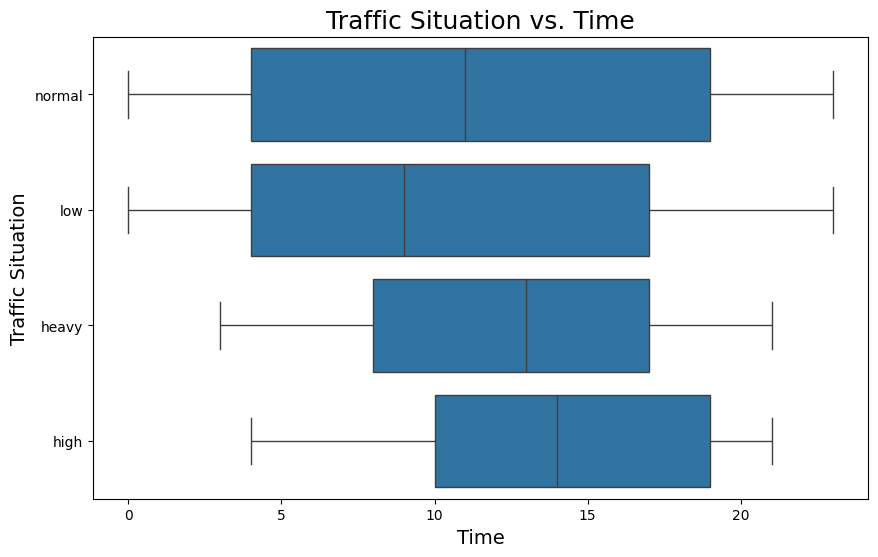

In [ ]:
# Plotting the boxplot
plt.figure(figsize=(10, 6))  # Set the figure size

# Boxplot with Seaborn
sns.boxplot(x='Time', y='Traffic Situation', data=data)

# Set plot title and labels
plt.title('Traffic Situation vs. Time', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Traffic Situation', fontsize=14)

# Show the plot
plt.show()

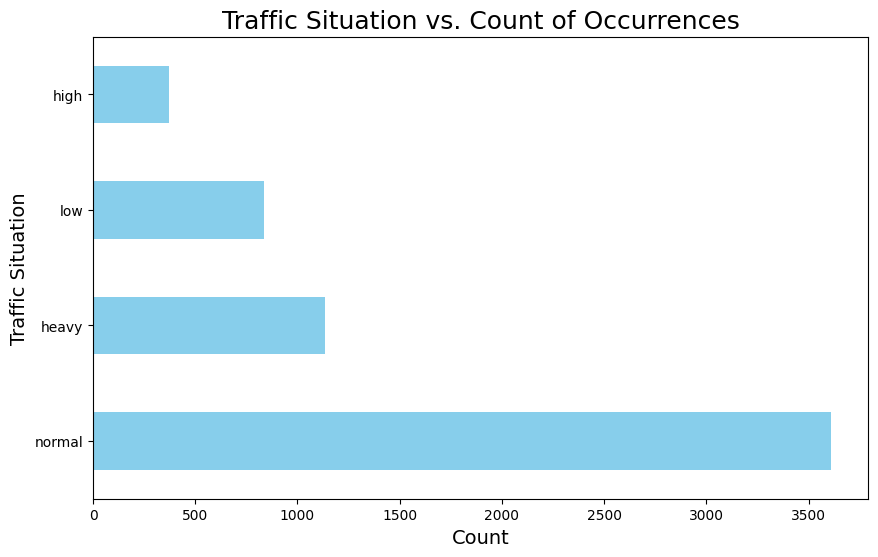

In [ ]:
# Count occurrences of each traffic situation
traffic_counts = data['Traffic Situation'].value_counts()

plt.figure(figsize=(10, 6))  # Set the figure size

# Horizontal bar graph with Matplotlib
traffic_counts.plot(kind='barh', color='skyblue')

# Set plot title and labels
plt.title('Traffic Situation vs. Count of Occurrences', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Traffic Situation', fontsize=14)

# Show the plot
plt.show()

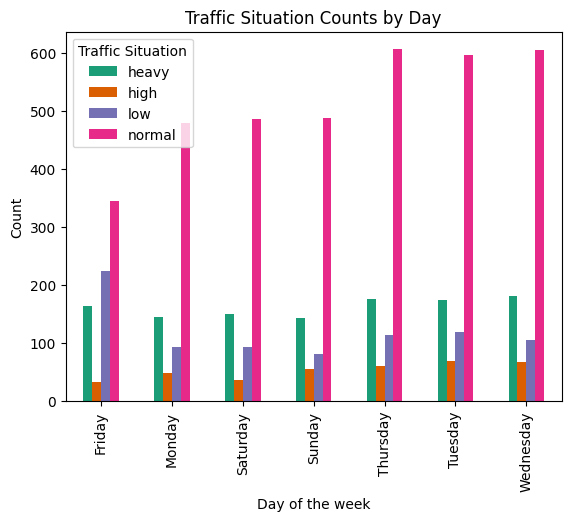

In [ ]:
traffic_counts = data.groupby(['Day of the week', 'Traffic Situation']).size().unstack()

# Plot the grouped data
traffic_counts.plot(kind='bar', color=sns.color_palette('Dark2'))

# Customize plot labels and title
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Traffic Situation Counts by Day')

# Show the plot
plt.show()

In [ ]:
data.head()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,Tuesday,13,2,2,24,41,normal
1,0,Tuesday,14,1,1,36,52,normal
2,0,Tuesday,10,2,2,32,46,normal
3,0,Tuesday,10,2,2,36,50,normal
4,1,Tuesday,11,2,1,34,48,normal


In [ ]:
label_encoder = LabelEncoder()
# Encoding the days of week to convert categorical values into numerical representations
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
data.head()

Mapping: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
Mapping: {'heavy': 0, 'high': 1, 'low': 2, 'normal': 3}


,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,5,13,2,2,24,41,3
1,0,5,14,1,1,36,52,3
2,0,5,10,2,2,32,46,3
3,0,5,10,2,2,36,50,3
4,1,5,11,2,1,34,48,3


In [ ]:
X = data.drop('Traffic Situation', axis=1)
y = data['Traffic Situation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(pd.DataFrame(X_train_scaled))

             0         1         2         3         4         5         6
0     0.941037  0.917901  0.793277  1.525799  0.824629 -0.050123  1.123471
1     0.508994  0.917901  0.704063 -0.876661 -0.626780 -0.050123  0.232208
2    -0.355093 -0.077926  1.395466  0.324569  1.711601 -1.689297  1.230423
3    -0.643121  0.917901  1.551589  1.525799  0.340826 -0.778645  1.479976
4     0.364979  1.415814  0.681760  0.839382  1.872868 -1.233971  0.891743
...        ...       ...       ...       ...       ...       ...       ...
4161 -0.643121  1.415814  1.685408  0.238767  0.663361 -1.233971  1.301724
4162 -1.507207  0.419987 -1.214020 -1.048265 -1.029949 -0.232253 -1.461193
4163 -0.211078  0.419987  0.257998  0.925184  0.098924  0.132007  0.446111
4164 -1.219179 -0.575839 -1.035593 -0.619254 -0.949315  1.771182 -0.819483
4165  1.661108  1.415814 -1.303233 -1.048265 -0.868681  1.497986 -1.158163

[4166 rows x 7 columns]


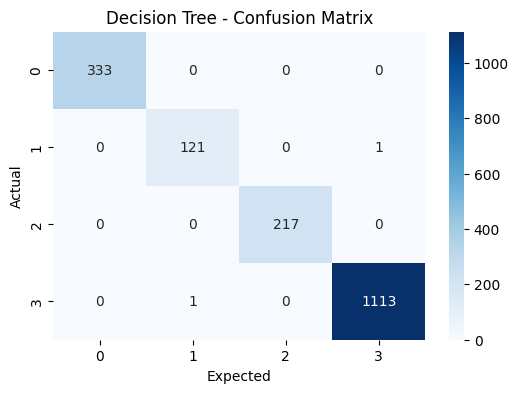

Decision Tree - Accuracy: 0.9988801791713325
Decision Tree - F1 Score: 0.9988801791713325
Classification report for Decision Tree:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       0.99      0.99      0.99       122
           2       1.00      1.00      1.00       217
           3       1.00      1.00      1.00      1114

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786



In [ ]:
from sklearn.metrics import f1_score

decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_scaled, y_train)
y_pred = decision_tree.predict(X_test_scaled)

decision_tree_accuracy = accuracy_score(y_test, y_pred)
decision_tree_f1 = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print(f'Decision Tree - Accuracy: {decision_tree_accuracy}')
print(f'Decision Tree - F1 Score: {decision_tree_f1}')
print("Classification report for Decision Tree:\n ",classification_report(y_test, y_pred))

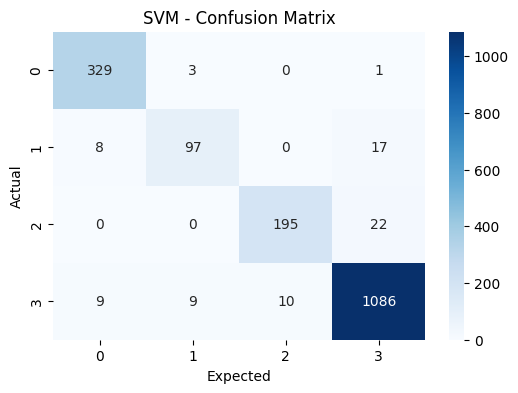

SVM - Accuracy: 0.9557670772676372
SVM - F1 Score: 0.9551439372567385
Classification report for SVM:
                precision    recall  f1-score   support

           0       0.95      0.99      0.97       333
           1       0.89      0.80      0.84       122
           2       0.95      0.90      0.92       217
           3       0.96      0.97      0.97      1114

    accuracy                           0.96      1786
   macro avg       0.94      0.91      0.93      1786
weighted avg       0.96      0.96      0.96      1786



In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('SVM - Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f'SVM - Accuracy: {svm_accuracy}')
print(f'SVM - F1 Score: {svm_f1}')
print("Classification report for SVM:\n ",classification_report(y_test, y_pred))

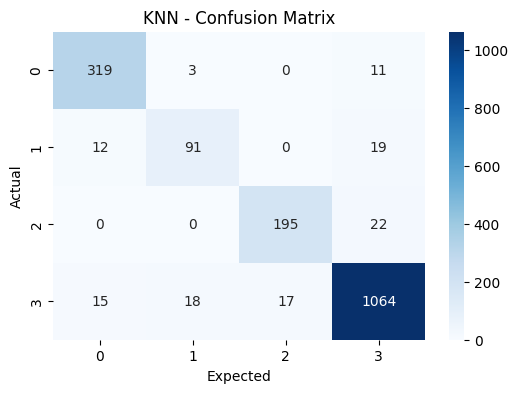

KNN - Accuracy: 0.9344904815229563
KNN - F1 Score: 0.9339864753786532
Classification report for KNN:
                precision    recall  f1-score   support

           0       0.92      0.96      0.94       333
           1       0.81      0.75      0.78       122
           2       0.92      0.90      0.91       217
           3       0.95      0.96      0.95      1114

    accuracy                           0.93      1786
   macro avg       0.90      0.89      0.90      1786
weighted avg       0.93      0.93      0.93      1786



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('KNN - Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f'KNN - Accuracy: {knn_accuracy}')
print(f'KNN - F1 Score: {knn_f1}')
print("Classification report for KNN:\n ",classification_report(y_test, y_pred))

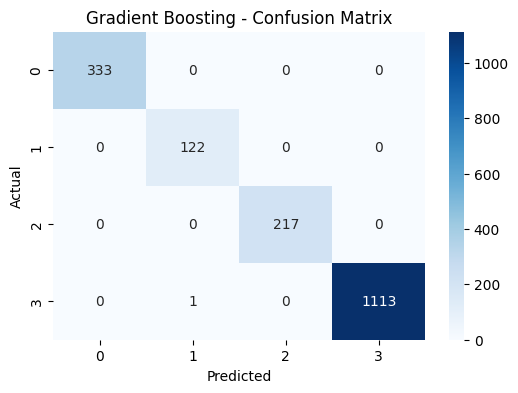

Gradient Boosting - Accuracy: 0.9994400895856663
Gradient Boosting - F1 Score: 0.9994411065504135
Classification report for Gradient Boosting:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       0.99      1.00      1.00       122
           2       1.00      1.00      1.00       217
           3       1.00      1.00      1.00      1114

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled, y_train)
y_pred = gradient_boosting.predict(X_test_scaled)

gradient_boosting_accuracy = accuracy_score(y_test, y_pred)
gradient_boosting_f1 = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f'Gradient Boosting - Accuracy: {gradient_boosting_accuracy}')
print(f'Gradient Boosting - F1 Score: {gradient_boosting_f1}')
print("Classification report for Gradient Boosting:\n ",classification_report(y_test, y_pred))

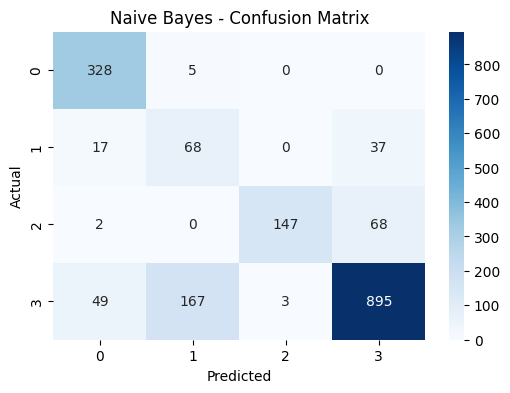

Naive Bayes - Accuracy: 0.8051511758118701
Naive Bayes - F1 Score: 0.8189188364957105
Classification report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       333
           1       0.28      0.56      0.38       122
           2       0.98      0.68      0.80       217
           3       0.90      0.80      0.85      1114

    accuracy                           0.81      1786
   macro avg       0.75      0.76      0.73      1786
weighted avg       0.85      0.81      0.82      1786



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Create and fit the Naive Bayes classifier (assuming Gaussian Naive Bayes for simplicity)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
y_pred = naive_bayes.predict(X_test_scaled)

# Calculate metrics
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
naive_bayes_f1 = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix with integer annotations
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print metrics
print(f'Naive Bayes - Accuracy: {naive_bayes_accuracy}')
print(f'Naive Bayes - F1 Score: {naive_bayes_f1}')
print("Classification report for Naive Bayes:\n", classification_report(y_test, y_pred))


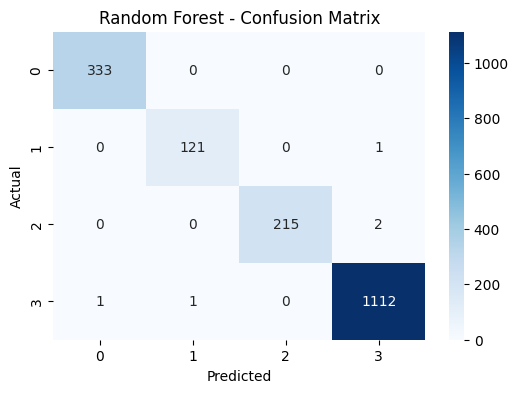

Random Forest - Accuracy: 0.9972004479283315
Random Forest - F1 Score: 0.997198903457302
Classification report for Random Forest:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       0.99      0.99      0.99       122
           2       1.00      0.99      1.00       217
           3       1.00      1.00      1.00      1114

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=13, min_samples_split= 5, min_samples_leaf=1, random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred = random_forest.predict(X_test_scaled)

random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_f1 = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f'Random Forest - Accuracy: {random_forest_accuracy}')
print(f'Random Forest - F1 Score: {random_forest_f1}')
print("Classification report for Random Forest:\n ",classification_report(y_test, y_pred))

Cross-validation scores: [0.99760192 0.99879952 0.99519808 0.99639856 0.99759904]
Mean cross-validation score: 0.9971194233088919


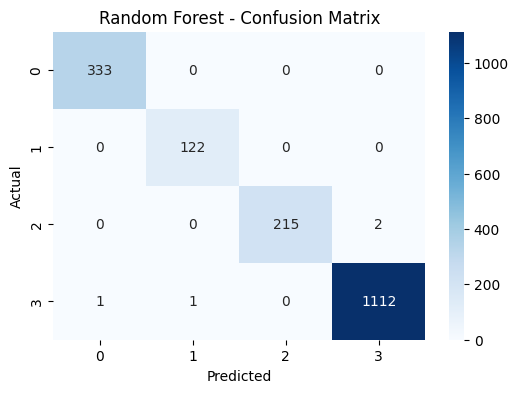

Random Forest - Accuracy: 0.9977603583426652
Random Forest - F1 Score: 0.9977593285620853
Classification report for Random Forest:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       0.99      1.00      1.00       122
           2       1.00      0.99      1.00       217
           3       1.00      1.00      1.00      1114

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_forest = RandomForestClassifier()

cv_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)

random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_f1 = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f'Random Forest - Accuracy: {random_forest_accuracy}')
print(f'Random Forest - F1 Score: {random_forest_f1}')
print("Classification report for Random Forest:\n ",classification_report(y_test, y_pred))


Mean cross-validation accuracy: 0.9971194233088919
Mean cross-validation F1 score: 0.9971216687283182


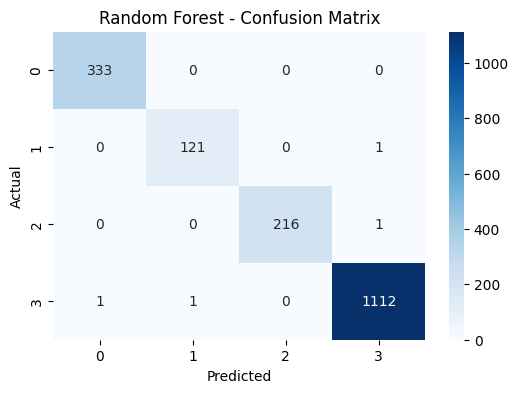

Random Forest - Accuracy on test data: 0.9977603583426652
Random Forest - F1 Score on test data: 0.9977601315177919
Classification report for Random Forest on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       0.99      0.99      0.99       122
           2       1.00      1.00      1.00       217
           3       1.00      1.00      1.00      1114

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier()

# Initialize the StratifiedKFold object with 5 folds
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store evaluation metrics
accuracy_scores = []
f1_scores = []

# Perform stratified cross-validation
for train_index, val_index in skf.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # Fit the model on the training fold
    random_forest.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_val_pred = random_forest.predict(X_val_fold)

    # Calculate accuracy and F1 score for the validation fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    fold_f1 = f1_score(y_val_fold, y_val_pred, average='weighted')

    # Append scores to the lists
    accuracy_scores.append(fold_accuracy)
    f1_scores.append(fold_f1)

# Calculate the mean accuracy and F1 score across folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)

print("Mean cross-validation accuracy:", mean_accuracy)
print("Mean cross-validation F1 score:", mean_f1)

# Fit the model on the entire training data
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test_scaled)

# Calculate accuracy and F1 score on the test data
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_f1 = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print accuracy and F1 score on the test data
print(f'Random Forest - Accuracy on test data: {random_forest_accuracy}')
print(f'Random Forest - F1 Score on test data: {random_forest_f1}')

# Print the classification report on the test data
print("Classification report for Random Forest on test data:\n", classification_report(y_test, y_pred))


In [ ]:
print("Length of X_train_scaled:", len(X_train_scaled))
print("Length of y_train:", len(y_train))


Length of X_train_scaled: 4166
Length of y_train: 4166


In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting', 'Naive Bayes'],
    'Accuracy': [decision_tree_accuracy, random_forest_accuracy, svm_accuracy, knn_accuracy, gradient_boosting_accuracy, naive_bayes_accuracy],
    'F1 Score': [decision_tree_f1, random_forest_f1, svm_f1, knn_f1, gradient_boosting_f1, naive_bayes_f1]
})
print(results.to_string())


               Model  Accuracy  F1 Score
0      Decision Tree  0.998880  0.998880
1      Random Forest  0.997760  0.997759
2                SVM  0.955767  0.955144
3                KNN  0.934490  0.933986
4  Gradient Boosting  0.999440  0.999441
5        Naive Bayes  0.805151  0.818919


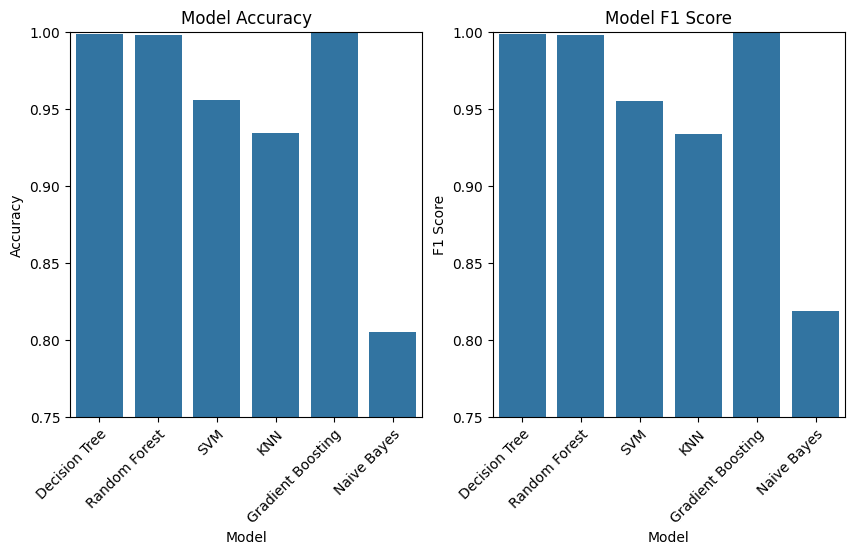

In [ ]:
# Grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Accuracy for each model
sns.barplot(x='Model', y='Accuracy', data=results, ax=axes[0])
axes[0].set_title('Model Accuracy')
axes[0].set_ylim(0.75,1)
# axes[0].set_ylim(0.9,1)

# F1 Score for each model
sns.barplot(x='Model', y='F1 Score', data=results, ax=axes[1], )
axes[1].set_title('Model F1 Score')
axes[1].set_ylim(0.75,1)
# axes[1].set_ylim(0.9,1)

# Rotate x-axis labels for better readability
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
fig.set_figwidth(10)

# Show the plot
plt.show()


In [ ]:
!pip install optuna
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define objective function for hyperparameter optimization
def objective(trial):
    # Define hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # Create Random Forest classifier with hyperparameters
    rf_clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Evaluate the model using cross-validation
    accuracy_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
    mean_accuracy = accuracy_scores.mean()

    return mean_accuracy  # Return the mean accuracy as the objective to be maximized

# Create Optuna study object
study = optuna.create_study(direction='maximize')  # Maximizing accuracy

# Optimize hyperparameters
study.optimize(objective, n_trials=10)

# Get the best hyperparameters found by Optuna
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model using the best hyperparameters
best_rf_clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_rf_clf.fit(X_train, y_train)

# Evaluate the final model on the test set
test_accuracy = best_rf_clf.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)


[I 2024-03-21 13:49:45,592] A new study created in memory with name: no-name-fb674fad-5dc8-40fa-a957-4a187bdcd5ea
[I 2024-03-21 13:50:00,490] Trial 0 finished with value: 0.9968496212755827 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9968496212755827.
[I 2024-03-21 13:50:17,755] Trial 1 finished with value: 0.9695442080294867 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9968496212755827.
[I 2024-03-21 13:50:21,160] Trial 2 finished with value: 0.9970597053091961 and parameters: {'n_estimators': 100, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.9970597053091961.
[I 2024-03-21 13:50:41,786] Trial 3 finished with value: 0.9966397576869153 and parameters: {'n_estimators': 1000, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 2 with valu

Best Hyperparameters: {'n_estimators': 100, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1}
Test Accuracy with Best Model: 0.9974811083123426


In [ ]:
pip install imbalanced-learn


In [ ]:
from sklearn.metrics import classification_report

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Initialize SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE()

# Initialize lists to store evaluation metrics
accuracy_scores = []
f1_scores = []

# Perform stratified cross-validation with SMOTE
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Apply SMOTE to the training data of the current fold
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    # The training data is sampled using SMOTE which helps remove the skew that is present in our dataset

    # Train the model on the resampled training data
    rf_classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test_fold)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred, average='weighted')

    # Store evaluation metrics in lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Calculate the mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)

print("Mean cross-validation accuracy:", mean_accuracy)
print("Mean cross-validation F1 score:", mean_f1)
print(X_train_resampled, y_train_resampled)

Mean cross-validation accuracy: 0.9968793272704766
Mean cross-validation F1 score: 0.9968819117885909
      Time  Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total
0       18                5       101         30        23          18    172
1       15                5        97          2         5          18    122
2        9                3       128         16        34           0    178
3        7                5       135         30        17          10    192
4       14                6        96         22        36           5    159
...    ...              ...       ...        ...       ...         ...    ...
7979    12                5        66         13         7           7     94
7980    23                1        13          0         0          16     30
7981    22                2        18          3         0          18     39
7982    12                4        47         12         0          17     77
7983     6                0        77   

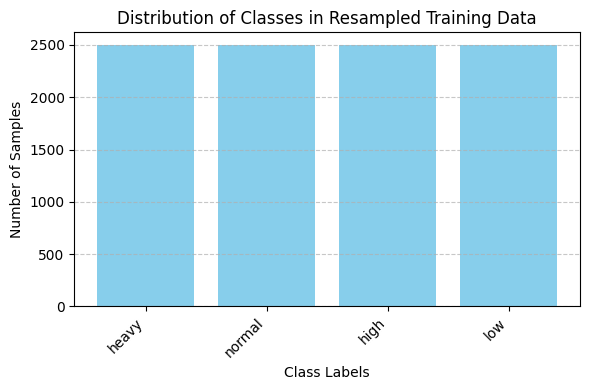

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming X_train, y_train, label_encoder, and smote are already defined
# Apply SMOTE to the entire training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class in the resampled y_train
class_counts = Counter(y_train_resampled)

# Extract the class labels and their corresponding counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Map the encoded class labels back to their original labels using the provided mapping
class_labels = [label_encoder.inverse_transform([c])[0] for c in classes]

# Plotting the bar graph with mapped class labels
plt.figure(figsize=(6, 4))
plt.bar(class_labels, counts, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in Resampled Training Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
